In [1]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 705.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [2]:
!pip install torchdata==0.5.1 torchtext==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.4 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2
  Attempting uninstall: torchdata
    Found existing installation: torchdata 0.6.1
    Uninstalling torchdata-0.6.1:
      Successfully uninstalled torchdata-0.6.1


In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu117.html

Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.1 MB/s eta 0:00:00


In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=21cee603fa4ba74d08a1601ec3477e2e20660967441c6c89695b7faeed7b47a6
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [1]:
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GATv2Conv
from torch_scatter import scatter_mean
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
from torch_geometric.nn import MetaLayer

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
device = torch.device("cuda" if torch.cuda.is_available()  else "cpu" )
device

device(type='cuda')

In [4]:
def get_int_map(dep):
    dep = df.loc[df["deployment"]==dep]
    dep = dep.reset_index(drop=True)
    return dep

In [5]:
# t1 = get_int_map(100)

In [6]:
df = pd.read_csv("/content/required_format.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/required_format.csv'

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,primary_channel,min_channel_allowed,max_channel_allowed,rssi,node_type,sinr,air_time_mean,deployment,channel_bonding_model,throughput
0,0,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-55.42,0,35.68,25.15,0.0,4,104.96
1,1,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-62.31,1,26.99,25.15,0.0,4,7.68
2,2,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-55.42,1,35.68,25.15,0.0,4,11.09
3,3,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-58.23,1,33.42,25.15,0.0,4,14.51
4,4,0.0,-79.65,-93.86,-109.01,-78.68,-85.3,-98.24,-108.79,-97.21,...,0,0,3,-66.64,1,26.83,25.15,0.0,4,11.95


In [ ]:
df.shape[0]

306424

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Creating individual graphs
# This assumes all APs and STAs are connected to each other
def create_graph(split,split_y,deployment):
    dep = get_int_map(deployment)
    dep_y = dep["throughput"]
    dep_x = dep[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)','z(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'rssi', 'node_type',
            'sinr', 'air_time_mean', 'deployment',"channel_bonding_model"]]
    #print(dep_x)
    dep_reset = dep.reset_index(drop=True)
    ap_index = {}
    out = dep_reset[dep_reset["node_type"] == 0]
    for i in range(len(out)):
        ap_index[out.index[i]] = i
    #print(ap_index)
    node_features = dep_x.iloc[:,12:].values
    # print(node_features)
    #edge_features = dep.iloc[:,:12].values - here each node has been given an edge feature
    # need to give each edge an edge feature
    node_targets = dep_y.values
    node_features = torch.tensor(node_features, dtype=torch.float)
    print(node_features.shape)
    #edge_features = torch.tensor(edge_features, dtype=torch.float)
    node_targets = torch.tensor(node_targets, dtype=torch.float)
    # Add edges here for each deployment
    edges = []
    edge_features = []
    edge_index = []
    for i in range(len(dep)):
        for j in range(len(dep)):
            if (i != j and (dep["node_type"].iloc[i] == 0 and dep["node_type"].iloc[j] == 0)) or (i !=j and (dep["node_type"].iloc[i] == 1 and dep["node_type"].iloc[j] == 0)):
                edges.append([i,j])
    #print(edges)
    edges2=edges
    edges = torch.tensor(edges, dtype=torch.float)
    #print("Edges: ", edges, edges.shape)
    # edge_index = torch.tensor(edges, dtype=torch.long)
    edge_index = torch.tensor(edges,dtype=torch.long)
    edge_index = edge_index.t().contiguous()
    #print(edges.detach(), edges.shape)
    print(edges.shape[0])
    for i in range(edges.shape[0]):
        # print(dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]])
        i_pos = np.asarray([dep.at[edges2[i][0],"x(m)"],dep.at[edges2[i][0],"y(m)"],dep.at[edges2[i][0],"z(m)"]])
        j_pos = np.asarray([dep.at[edges2[i][1],"x(m)"],dep.at[edges2[i][1],"y(m)"],dep.at[edges2[i][1],"z(m)"]])
        distance = np.linalg.norm(i_pos - j_pos)
        #print(i)
        # edge_features.append([distance,dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]]])
        edge_type = 0
        if int(edges2[i][0]) in ap_index.keys():
          edge_type = 0
        else:
          edge_type = 1
        edge_features.append([edge_type,dep.at[edges2[i][0],"rssi"],dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]]])
    # edge_features = np.array(edge_features)
    # print(edge_features)
    edge_features = torch.tensor(edge_features, dtype=torch.float)
    #print(edge_features, edge_features.shape)
    graph = {
        "edges": edges,
        "edge_index": edge_index,
        "node_features": node_features,
        "edge_features": edge_features,
        "node_targets": node_targets
    }
#     print("*"*10)
#     print(edges.shape)
#     print(edge_index.shape)
#     print(node_features.shape)
#     print(edge_features.shape)
#     print(node_targets.shape)
    return graph

In [ ]:
create_graph(0,0,0)

torch.Size([170, 13])
2028


{'edges': tensor([[  0.,  11.],
         [  0.,  27.],
         [  0.,  44.],
         ...,
         [169., 128.],
         [169., 139.],
         [169., 156.]]),
 'edge_index': tensor([[  0,   0,   0,  ..., 169, 169, 169],
         [ 11,  27,  44,  ..., 128, 139, 156]]),
 'node_features': tensor([[ 0.0000,  7.5000,  8.3333,  ..., 25.1500,  0.0000,  4.0000],
         [ 0.0000, 12.0627,  4.6918,  ..., 25.1500,  0.0000,  4.0000],
         [ 0.0000,  8.2712,  4.8383,  ..., 25.1500,  0.0000,  4.0000],
         ...,
         [11.0000, 56.2321, 45.8161,  ..., 25.7725,  0.0000,  4.0000],
         [11.0000, 50.4659, 43.8516,  ..., 25.7725,  0.0000,  4.0000],
         [11.0000, 46.8457, 36.8127,  ..., 25.7725,  0.0000,  4.0000]]),
 'edge_features': tensor([[   0.0000,  -55.4200,    0.0000],
         [   0.0000,  -55.4200,  -79.6500],
         [   0.0000,  -55.4200,  -93.8600],
         ...,
         [   1.0000,  -64.6900, -108.8900],
         [   1.0000,  -64.6900,  -96.9100],
         [   1.00

In [ ]:
def create_geometric_graph(graph):
    data = Data(
        # Input graph.
        x=graph["node_features"],
        #pos=pos,
        edge_index=graph["edge_index"],
        edge_attr=graph["edge_features"],
        # Output node targets.
        y=graph["node_targets"],
        num_nodes = len(graph["node_features"])

    )

    return data

In [ ]:
print(create_geometric_graph(create_graph(0,0,0)))

torch.Size([170, 13])
2028
Data(x=[170, 13], edge_index=[2, 2028], edge_attr=[2028, 3], y=[170], num_nodes=170)


In [ ]:
!rm -r /content/train
!rm -r /content/valid
!rm -r /content/test

rm: cannot remove '/content/train': No such file or directory
rm: cannot remove '/content/valid': No such file or directory
rm: cannot remove '/content/test': No such file or directory


In [ ]:
# With train, validation and test data.
import random
import os
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
# divide into training and testing points
class CustomDataset(InMemoryDataset):
    def __init__(self, split="train", transform=None):
        self.data = pd.read_csv("/content/required_format.csv")
        self.split = split
        super(CustomDataset, self).__init__( split, transform)
        #self.data, self.slices = torch.load(self.processed_paths[0])
        #self.data = pd.read_csv("deployment_with_int_map.csv")
        #self.data, self.slices = pd.read_csv("deployment_with_int_map.csv")

        # print("In init")

    @property
    def raw_file_names(self):
        # print("In raw_file_names")
        return ["/content/required_format.csv"]

    @property
    def processed_file_names(self):
        # print("In processed_file_names")
        li = ['data_train_' + str(i) + '.pt' for i in range(1152)]+ ['data_valid_' + str(j) + '.pt' for j in range(1152, 1536)] + ['data_test_' + str(k) + '.pt' for k in range(1536, 1920)]
        #print(li)
        return ['data_train_' + str(i) + '.pt' for i in range(1152)]+ ['data_valid_' + str(j) + '.pt' for j in range(1152,1536)] + ['data_test_' + str(k) + '.pt' for k in range(384)]

    def _download(self):
        '''
        print("In download")
        path = download_url(self.url, self.raw_dir)
        extract_zip(path, self.raw_dir)
        # The zip file is removed
        os.unlink(path)
        '''
        pass

    def process(self):
        print("In process")
        #df = pd.read_csv(self.raw_paths[0])
        X = self.data[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)','z(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'node_type','rssi',
            'sinr', 'air_time_mean','channel_bonding_model','deployment']]
        y = self.data.loc[:, ["throughput", "deployment"]]
#         X_train = X.iloc[:183854, :]
#         X_valid = X.iloc[183854:245139, :]
#         X_test = X.iloc[245139:,:]
#         print(X_test.columns)
#         y_train = y.iloc[:183854, :]
#         y_valid = y.iloc[183854:245139, :]
#         y_test = y.iloc[245139:,:]
        graphs = []
        # print("Here")
        l = [i for i in range(1920)]
        self.l_train = random.sample(l, 1152)
        l = [x for x in l if x not in self.l_train]
        self.l_valid = random.sample(l, 384)
        l = [x for x in l if x not in self.l_valid]
        self.l_test = l
        count = 0
        if(self.split == "train"):

            for i in self.l_train:

                #X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
                #y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)

                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_train_{count}.pt'))
                count += 1
        elif(self.split == "valid"):
            for i in self.l_valid:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_valid_{count}.pt'))
                count += 1
        else:
            for i in self.l_test:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_test_{count}.pt'))
                count += 1
        #return graphs[idx]

    def __len__(self):
        if(self.split == "train"):
            #return len(self.processed_file_names[0])
            return 1152
        elif self.split == "valid":
            return 384
        else:
            return 384

    def __getitem__(self, idx):
        #print("Part: ", self.processed_file_names[1])

        if(self.split == "train"):
            data = torch.load(os.path.join(self.processed_dir, f'data_train_{idx}.pt'))
        elif(self.split == "valid"):
            data = torch.load(os.path.join(self.processed_dir, f'data_valid_{idx}.pt'))
        elif (self.split=="test"):
            data = torch.load(os.path.join(self.processed_dir, f'data_test_{idx}.pt'))
        return data

In [18]:
dataset_train = CustomDataset( split='train')
dataset_valid = CustomDataset( split='valid')
dataset_test = CustomDataset( split='test')

Processing...


In process
torch.Size([175, 13])
1740
torch.Size([200, 13])
2388
torch.Size([176, 13])
2100
torch.Size([205, 13])
2448
torch.Size([196, 13])
2340
torch.Size([168, 13])
1670
torch.Size([170, 13])
2028
torch.Size([125, 13])
992
torch.Size([186, 13])
2220
torch.Size([122, 13])
968
torch.Size([121, 13])
960
torch.Size([144, 13])
1144
torch.Size([151, 13])
1500
torch.Size([131, 13])
1040
torch.Size([196, 13])
2340
torch.Size([155, 13])
1540
torch.Size([203, 13])
2424
torch.Size([185, 13])
2208
torch.Size([120, 13])
952
torch.Size([131, 13])
1040
torch.Size([121, 13])
960
torch.Size([169, 13])
1680
torch.Size([169, 13])
1680
torch.Size([115, 13])
912
torch.Size([188, 13])
2244
torch.Size([130, 13])
1032
torch.Size([164, 13])
1630
torch.Size([133, 13])
1056
torch.Size([119, 13])
944
torch.Size([139, 13])
1104
torch.Size([145, 13])
1152
torch.Size([128, 13])
1016
torch.Size([138, 13])
1096
torch.Size([160, 13])
1590
torch.Size([147, 13])
1460
torch.Size([169, 13])
1680
torch.Size([135, 13])
10

Done!
Processing...


In process
torch.Size([178, 13])
2124
torch.Size([165, 13])
1640
torch.Size([161, 13])
1600
torch.Size([136, 13])
1080
torch.Size([127, 13])
1008
torch.Size([119, 13])
944
torch.Size([145, 13])
1152
torch.Size([189, 13])
2256
torch.Size([166, 13])
1650
torch.Size([129, 13])
1024
torch.Size([153, 13])
1520
torch.Size([187, 13])
2232
torch.Size([128, 13])
1016
torch.Size([205, 13])
2448
torch.Size([179, 13])
1780
torch.Size([127, 13])
1008
torch.Size([198, 13])
2364
torch.Size([134, 13])
1064
torch.Size([143, 13])
1420
torch.Size([176, 13])
2100
torch.Size([180, 13])
2148
torch.Size([135, 13])
1340
torch.Size([184, 13])
2196
torch.Size([143, 13])
1136
torch.Size([205, 13])
2448
torch.Size([125, 13])
992
torch.Size([124, 13])
984
torch.Size([182, 13])
2172
torch.Size([159, 13])
1580
torch.Size([144, 13])
1430
torch.Size([129, 13])
1024
torch.Size([127, 13])
1008
torch.Size([159, 13])
1580
torch.Size([141, 13])
1400
torch.Size([163, 13])
1620
torch.Size([136, 13])
1080
torch.Size([162, 13]

Done!
Processing...


In process
torch.Size([206, 13])
2460
torch.Size([185, 13])
2208
torch.Size([185, 13])
2208
torch.Size([178, 13])
2124
torch.Size([193, 13])
2304
torch.Size([184, 13])
2196
torch.Size([207, 13])
2472
torch.Size([198, 13])
2364
torch.Size([189, 13])
2256
torch.Size([185, 13])
2208
torch.Size([185, 13])
2208
torch.Size([188, 13])
2244
torch.Size([191, 13])
2280
torch.Size([176, 13])
2100
torch.Size([201, 13])
2400
torch.Size([205, 13])
2448
torch.Size([208, 13])
2484
torch.Size([215, 13])
2568
torch.Size([185, 13])
2208
torch.Size([187, 13])
2232
torch.Size([220, 13])
2628
torch.Size([196, 13])
2340
torch.Size([190, 13])
2268
torch.Size([202, 13])
2412
torch.Size([177, 13])
2112
torch.Size([182, 13])
2172
torch.Size([184, 13])
2196
torch.Size([188, 13])
2244
torch.Size([195, 13])
2328
torch.Size([186, 13])
2220
torch.Size([189, 13])
2256
torch.Size([194, 13])
2316
torch.Size([195, 13])
2328
torch.Size([195, 13])
2328
torch.Size([195, 13])
2328
torch.Size([184, 13])
2196
torch.Size([199, 

Done!


In [19]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_scatter import scatter_mean
from torch_geometric.nn import MetaLayer

class EdgeModel(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, hiddens, n_targets):
        super().__init__()
        self.edge_mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * n_node_features + n_edge_features, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, src, dest, edge_attr, u=None, batch=None):
        #print("In edge model")
        #print(src, src.shape)
        #print(dest, dest.shape)
        #print(edge_attr, edge_attr.shape)
        out = torch.cat([src, dest, edge_attr], 1)
        out = self.edge_mlp(out)
        #print("Exit edge model")
        return out


class NodeModel(torch.nn.Module):
    def __init__(self, n_node_features, hiddens, n_targets):
        super(NodeModel, self).__init__()
        self.node_mlp_1 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, hiddens),
        )
        self.node_mlp_2 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.ReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, x, edge_index, edge_attr, u, batch):
        #print("In node model")
        row, col = edge_index
        out = torch.cat([x[col], edge_attr], dim=1)
        out = self.node_mlp_1(out)
        out = scatter_mean(out, row, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out], dim=1)
        out = self.node_mlp_2(out)
        #print("Exit node model")
        return out


class MetaNet(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, num_hidden):
        super(MetaNet, self).__init__()

        # Input Layer
        self.input = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=n_node_features, n_edge_features=n_edge_features,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=n_node_features, hiddens=num_hidden, n_targets=num_hidden)
            )

        # Output Layer
        self.output = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=num_hidden, n_edge_features=num_hidden,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=num_hidden, hiddens=num_hidden, n_targets=1)
        )

    def forward(self, data):
        x, edge_index, edge_attr, y = data.x, data.edge_index, data.edge_attr, data.y
        #print("In meta model")
        x, edge_attr, _ = self.input(x, edge_index, edge_attr)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x, edge_attr, _ = self.output(x, edge_index, edge_attr)
        #x = F.dropout(x, p=0.5, training=self.training)
        #print("Exit meta model")
        return x

class Net(torch.nn.Module):
    def __init__(self, num_input, num_hidden):
        super(Net, self).__init__()

        self.name = "Net"

        # Input GCN layer.
        self.conv1 = GCNConv(num_input, num_hidden)
        self.conv2 = GCNConv(num_hidden, num_hidden)
        self.conv3 = GCNConv(num_hidden, 1)

    def forward(self, data):
        x, edge_index, y = data.x, data.edge_index, data.y

        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = F.dropout(x, training=self.training)

        x = self.conv3(x, edge_index)

        return x

class AttentionNet(torch.nn.Module):
    def __init__(self, num_input, num_hidden):
        super(AttentionNet, self).__init__()

        self.name = "AttentionNet"

        # Input GCN layer.
        self.conv1 = GATv2Conv(num_input, num_hidden,heads=2,concat=False)
        self.conv2 = GATv2Conv(num_hidden, num_hidden,heads=2,concat=False)
        self.conv3 = GATv2Conv(num_hidden, 1,num_heads=2,concat=False)

    def forward(self, data):
        x, edge_index, y = data.x, data.edge_index, data.y

        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = F.dropout(x, training=self.training)

        x = self.conv3(x, edge_index)
        x = F.relu(x)
        return x


# MODS TO MODEL START HERE

In [20]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GATv2Conv
from torch_scatter import scatter_mean
from torch_geometric.nn import MetaLayer

class EdgeModel(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, hiddens, n_targets):
        super().__init__()
        # self.edge_mlp = torch.nn.Sequential(
        #     # torch.nn.Linear(2 * n_node_features + n_edge_features, hiddens),
        #     # torch.nn.ReLU(),
        #     # torch.nn.Linear(hiddens, n_targets),
        #     GATv2Conv(2 * n_node_features + n_edge_features, n_targets,heads=2,concat=False),
        #     torch.nn.PReLU(),
        #     GATv2Conv(n_targets, n_targets,heads=2,concat=False)
        # )
        self.gatedge1 = GATv2Conv(2 * n_node_features + n_edge_features, n_targets,heads=2,concat=False)
        self.prelu = torch.nn.PReLU()
        self.gatedge2 = GATv2Conv(n_targets,n_targets,heads=2,concat=False)

    def forward(self, src, dest, edge_index,edge_attr, u=None, batch=None):
        out = torch.cat([src, dest, edge_index,edge_attr], 1)
        out = self.gatedge1(out,edge_index)
        out = self.prelu(out)
        out = self.gatedge2(out,edge_index)
        #print("Exit edge model")
        return out


class NodeModel(torch.nn.Module):
    def __init__(self, n_node_features, hiddens, n_targets):
        super(NodeModel, self).__init__()
        # self.node_mlp_1 = torch.nn.Sequential(
        #     GATv2Conv(n_node_features + hiddens, hiddens,heads=2,concat=False),
        #     torch.nn.PReLU(),
        #     GATv2Conv(hiddens, hiddens,heads=2,concat=False)
        # )
        self.gat11 = GATv2Conv(n_node_features+hiddens,hiddens,heads=2,concat=False)
        self.prelu = torch.nn.PReLU()
        self.gat12 = GATv2Conv(hiddens,hiddens,heads=2,concat=False)

        # self.node_mlp_2 = torch.nn.Sequential(
        #     GATv2Conv(n_node_features + hiddens, hiddens,heads=2,concat=False),
        #     torch.nn.PReLU(),
        #     GATv2Conv(hiddens, n_targets,heads=2,concat=False)
        # )
        self.gat21 = GATv2Conv(n_node_features+hiddens,hiddens,heads=2,concat=False),
        self.gat22 = GATv2Conv(hiddens,hiddens,heads=2,concat=False)

    def forward(self, x, edge_index, edge_attr, u, batch):
        #print("In node model")
        row, col = edge_index
        out = torch.cat([x[col], edge_index,edge_attr], dim=1)
        out = self.gat11(out,edge_index)
        out = self.prelu(out)
        out = self.gat12(out,edge_index)
        out = scatter_mean(out, row, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out], dim=1)
        out = self.gat21(out,edge_index)
        out = self.prelu(out)
        out = self.gat22(out,edge_index)
        #print("Exit node model")
        return out


class MetaNet(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, num_hidden):
        super(MetaNet, self).__init__()

        # input layer
        self.input = MetaLayer(EdgeModel(n_node_features, n_edge_features, num_hidden, num_hidden),
                                 NodeModel(n_node_features, num_hidden, num_hidden))

        # output layer
        self.output = MetaLayer(EdgeModel(n_node_features, num_hidden, num_hidden, num_hidden),
                                    NodeModel(n_node_features, num_hidden, 1))

        self.name = "MetaNet"

    def forward(self, data):
        x, edge_index, edge_attr, y = data.x, data.edge_index, data.edge_attr, data.y
        #print("In meta model")
        x, edge_index, edge_attr = self.input(x, edge_index, edge_attr)
        x = torch.nn.PReLU()(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x, edge_index, edge_attr = self.output(x, edge_index, edge_attr)
        #x = F.dropout(x, p=0.5, training=self.training)
        #print("Exit meta model")
        return x


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_scatter import scatter_mean
from torch_geometric.nn import MetaLayer

class EdgeModel(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, hiddens, n_targets):
        super().__init__()
        self.edge_mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * n_node_features + n_edge_features, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, src, dest, edge_attr, u=None, batch=None):
        #print("In edge model")
        #print(src, src.shape)
        #print(dest, dest.shape)
        #print(edge_attr, edge_attr.shape)
        out = torch.cat([src, dest, edge_attr], 1)
        out = self.edge_mlp(out)
        out = F.relu(out) ### ADDED THIS ###
        #print("Exit edge model")
        return out


class NodeModel(torch.nn.Module):
    def __init__(self, n_node_features, hiddens, n_targets):
        super(NodeModel, self).__init__()
        self.node_mlp_1 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, hiddens),
        )
        self.node_mlp_2 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, x, edge_index, edge_attr, u, batch):
        #print("In node model")
        row, col = edge_index
        out = torch.cat([x[col], edge_attr], dim=1)
        out = self.node_mlp_1(out)
        out = scatter_mean(out, row, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out], dim=1)
        out = self.node_mlp_2(out)
        #print("Exit node model")
        return out

class MetaNet(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, num_hidden):
        super(MetaNet, self).__init__()

        # Input Layer
        self.input = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=n_node_features, n_edge_features=n_edge_features,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=n_node_features, hiddens=num_hidden, n_targets=num_hidden)
            )

        # Output Layer
        self.output = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=num_hidden, n_edge_features=num_hidden,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=num_hidden, hiddens=num_hidden, n_targets=1)
        )

        # Attention Mechanism
        self.attention = torch.nn.MultiheadAttention(embed_dim=num_hidden, num_heads=2, dropout=0.2)

    def forward(self, data):
        x, edge_index, edge_attr, y = data.x, data.edge_index, data.edge_attr, data.y
        x, edge_attr, _ = self.input(x, edge_index, edge_attr)
        x = F.relu(x)
        # x = F.dropout(x, p=0.2, training=self.training)

        # Attention Mechanism
        x = x.unsqueeze(0)
        x, _ = self.attention(x, x, x)
        x = x.squeeze(0)

        x, edge_attr, _ = self.output(x, edge_index, edge_attr)
        #x = F.dropout(x, p=0.5, training=self.training)
        return x

# MODS TO MODEL END HERE

In [22]:
num_node_features = 13
num_edge_features = 3
num_hidden = 128

In [23]:
model = MetaNet(num_node_features, num_edge_features, num_hidden).to(device)


In [ ]:
# model  = Net(num_node_features, num_hidden).to(device)

In [24]:
model.eval()

MetaNet(
  (input): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=29, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
    (node_mlp_2): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    global_model=None
  )
  (output): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=384, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node

In [25]:
optimizer = torch.optim.Adam(lr=1e-4,params=model.parameters())

In [26]:
def train(dataset):
    # Monitor training.
    losses = []

    # Put model in training mode!
    model.train()
    i=0
    for i, batch in enumerate(dataset):
        #print("misaa")
        # Training step.

        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))
        #print(f"Training oss for {i}: {loss}")
        loss.backward()
        optimizer.step()
        # Monitoring
        losses.append(loss.item())
        if(i == 1151): break
    # Return training metrics.
    return losses


def evaluate(dataset):
    # Monitor evaluation.
    losses = []

    # Validation (1)
    model.eval()
    i = 0
    for i, batch in enumerate(dataset):
        batch = batch.to(device)

        # Calculate validation losses.
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))

        # Metric logging.
        losses.append(loss.item())
        if(i == 383): break
    return losses

In [27]:
from sklearn.utils import shuffle
from torch_geometric.data import DataLoader
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=3, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

In [28]:
for batch in train_loader:
    print(batch)
    break

DataBatch(x=[5160, 13], edge_index=[2, 54000], edge_attr=[54000, 3], y=[5160], num_nodes=5160, batch=[5160], ptr=[33])


In [29]:
# Metrics recorder per epoch.
train_losses = []

valid_losses = []
valid_losses_corrected = []

# Training loop.
model.train()
for epoch in range(3000):
    # Train.
    train_epoch_losses = train(train_loader)
    print(f"Epoch: {epoch}, Len of Training loss: {len(train_epoch_losses)}, Average loss: {float(np.sum(train_epoch_losses))/len(train_epoch_losses)}")
    train_losses.append(np.mean(train_epoch_losses))

    valid_epoch_losses= evaluate(valid_loader)
    print(f"Len of Validation loss: {len(valid_epoch_losses)}, Average loss: {float(np.sum(valid_epoch_losses))/len(valid_epoch_losses)}")
    valid_losses.append(np.mean(valid_epoch_losses))
    if epoch==500:
      torch.save(model,"model_500.pth")
    if epoch==1000:
      torch.save(model,"model_1000.pth")
    if epoch==1500:
      torch.save(model,"model_1500.pth")
    if epoch==2500:
      torch.save(model,"model_2500.pth")

Streaming output truncated to the last 5000 lines.
Epoch: 500, Len of Training loss: 36, Average loss: 1.884957042005327
Len of Validation loss: 128, Average loss: 1.8187359031289816
Epoch: 501, Len of Training loss: 36, Average loss: 1.8454193505975935
Len of Validation loss: 128, Average loss: 1.8082033637911081
Epoch: 502, Len of Training loss: 36, Average loss: 1.8921365837256114
Len of Validation loss: 128, Average loss: 1.7986390315927565
Epoch: 503, Len of Training loss: 36, Average loss: 1.956673930088679
Len of Validation loss: 128, Average loss: 1.8524290942586958
Epoch: 504, Len of Training loss: 36, Average loss: 1.902925494644377
Len of Validation loss: 128, Average loss: 1.870206018909812
Epoch: 505, Len of Training loss: 36, Average loss: 1.923675970898734
Len of Validation loss: 128, Average loss: 1.8909411504864693
Epoch: 506, Len of Training loss: 36, Average loss: 1.886351744333903
Len of Validation loss: 128, Average loss: 1.8828103449195623
Epoch: 507, Len of Train

In [30]:
import matplotlib.pyplot as plt

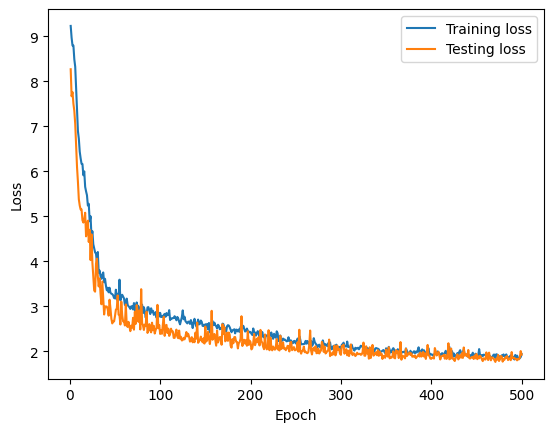

In [31]:
num_epochs = 500

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:500], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:500], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

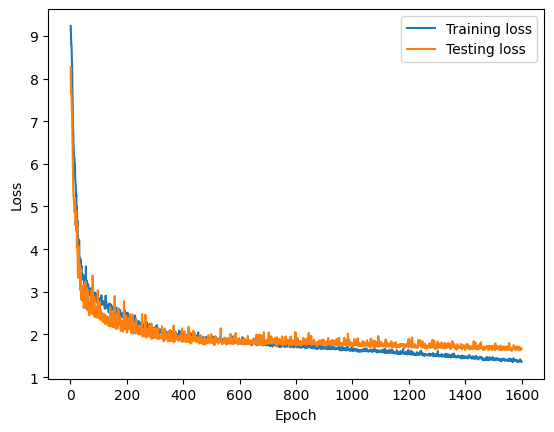

In [32]:
num_epochs = 1600

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:1600], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:1600], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

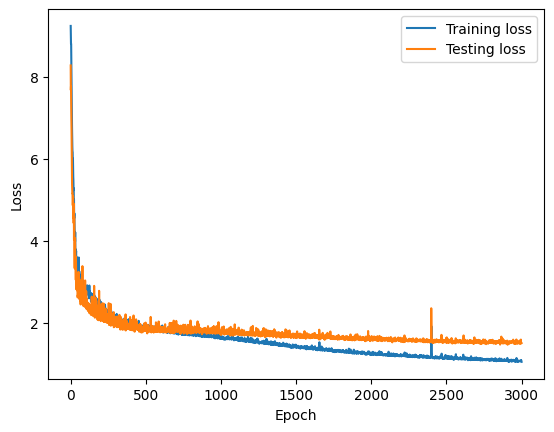

In [33]:
num_epochs = 3000

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:3000], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:3000], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
torch.save(model,"GAT_3k.pth")

In [35]:
modelv2 = torch.load("GAT_3k.pth")
modelv2.eval()

MetaNet(
  (input): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=29, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
    (node_mlp_2): Sequential(
      (0): Linear(in_features=141, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    global_model=None
  )
  (output): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=384, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node

In [44]:
#evaluate the model on the test set
test_epoch_losses= evaluate(test_loader)
print(f"Len of Validation loss: {len(test_epoch_losses)}, Average loss: {float(np.sum(test_epoch_losses))/len(test_epoch_losses)}")
valid_losses.append(np.mean(test_epoch_losses))





Len of Validation loss: 384, Average loss: 1.2066738811069324


In [41]:
(np.array(test_epoch_losses)).shape

(128,)

In [45]:
#calculate the mean squared error for the test set
print(np.mean(test_epoch_losses))
#calculate the mean absolute error for the test set
print(np.mean(np.sqrt(test_epoch_losses)))
#calculate the root mean squared error for the test set
print(np.sqrt(np.mean(test_epoch_losses)))



1.2066738811069324
1.0166825899169798
1.0984870873646775


In [46]:
squared_loss = [i**2 for i in test_epoch_losses]
print(np.mean(squared_loss))
#calculate the mean absolute error for the test set
print(np.mean(np.sqrt(squared_loss)))
#calculate the root mean squared error for the test set
print(np.sqrt(np.mean(squared_loss)))

2.6939736510830614
1.2066738811069324
1.6413328885643708


In [7]:
np.set_printoptions(suppress=True)
for data in test_loader:
    #create a 3d plot of the access points which has node_type = 0 and the stations which has node_type=1 
    #and the edges between them
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = data.x[:,0].cpu().detach().numpy()
    y = data.x[:,1].cpu().detach().numpy()
    z = data.x[:,2].cpu().detach().numpy()
    node_type = data.x[:,10].cpu().detach().numpy()
    ax.scatter(x[node_type==0], y[node_type==0], z[node_type==0], c='r', marker='o')
    ax.scatter(x[node_type==1], y[node_type==1], z[node_type==1], c='b', marker='o')
    for i in range(len(data.edge_index[0])):
        if data.x[ data.edge_index[0][i],10] == 0 and data.x[ data.edge_index[1][i],10] == 1:
            x_values = [data.x[ data.edge_index[0][i],0],data.x[ data.edge_index[1][i],0]]
            y_values = [data.x[ data.edge_index[0][i],1],data.x[ data.edge_index[1][i],1]]
            z_values = [data.x[ data.edge_index[0][i],2],data.x[ data.edge_index[1][i],2]]
            ax.plot(x_values, y_values, z_values)
    plt.show()
    break


NameError: name 'test_loader' is not defined

In [47]:
# #evaluate model and predict on the test set
# np.set_printoptions(suppress=True)
# #dont print tensor in scientific notation
# torch.set_printoptions(sci_mode=False)
# modelv2.eval()
# for data in test_loader:
#     # print(data.shape)
#     out = modelv2(data.to(device))
#     # #print the predicted values and the actual values side by side for comparison

#     print(out)
#     print(data.y)
#     break


In [54]:
import torch
import numpy as np

# Set the model in evaluation mode
modelv2.eval()

# Initialize variables
mse = 0.0
total_samples = 0

# Iterate over the test loader batches
for data in test_loader:
    # Pass the data through the model
    out = modelv2(data.to(device))

    # Calculate squared differences
    squared_diff = torch.pow(out.view(-1) - data.y.view(-1), 2)
    # print(torch.cat((out.view(-1,1),data.y.view(-1,1)),1))

    # Accumulate the squared differences
    mse += torch.sum(squared_diff).item()

    # Update the total number of samples
    total_samples += len(data.y)

# Calculate the mean squared error
mse /= total_samples

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 1.6629234308900376
